In [1]:
import pandas as pd
data = pd.read_csv('datasets/lyrics.csv')

In [2]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
# from sklearn import datasets
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

In [6]:
data['Lyrics'] = data['Lyrics'].astype(str)

In [7]:
# Load the regular expression library
import re
# Remove punctuation
data['lyrics_processed'] = data['Lyrics'].map(lambda x: re.sub('[,\.!?]', '', x))
# removing anything and everything between '[' and ']'
data['lyrics_processed'] = data['lyrics_processed'].map(lambda x: re.sub('\[.*\]', '', x))
# Convert the titles to lowercase
data['lyrics_processed'] = data['lyrics_processed'].map(lambda x: x.lower())

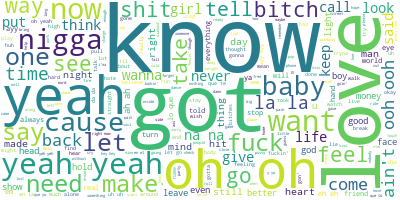

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['lyrics_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [11]:
import gensim
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = data.lyrics_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['tryna', 'put', 'worst', 'mood', 'ah', 'cleaner', 'church', 'shoes', 'ah', 'milli', 'point', 'two', 'hurt', 'ah', 'red', 'lamb', 'tease', 'ah', 'none', 'toys', 'lease', 'ah', 'made', 'whole', 'year', 'week', 'yah', 'main', 'bitch', 'league']


In [12]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 14), (1, 3), (2, 1), (3, 3), (4, 1), (5, 2), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 6), (25, 1), (26, 2), (27, 8), (28, 3), (29, 1)]


In [19]:
from pprint import pprint
# coherence_sores = []
# for i in range(3,30):
for i in range(30,100):
    # number of topics
    num_topics = 10
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
    # Print the Keyword in the 10 topics
    # pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    from gensim.models.coherencemodel import CoherenceModel
    # Compute Coherence Score using c_v
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)

    coherence_sores.append([i, coherence_lda])


Coherence Score:  0.40869440282686026

Coherence Score:  0.41221844584880296

Coherence Score:  0.3849038388130186

Coherence Score:  0.41003886319152727

Coherence Score:  0.43253482218103123

Coherence Score:  0.3286228283127669

Coherence Score:  0.34277735212137156

Coherence Score:  0.36066300157532194

Coherence Score:  0.38180392528024304

Coherence Score:  0.2898270844202474

Coherence Score:  0.3442815202752455

Coherence Score:  0.46287805140349525

Coherence Score:  0.3140306206466513

Coherence Score:  0.35733192149144466

Coherence Score:  0.31070696712463336

Coherence Score:  0.40377268160844804

Coherence Score:  0.2833259891165854

Coherence Score:  0.35766571341746994

Coherence Score:  0.36322629490513425

Coherence Score:  0.37851809900425065

Coherence Score:  0.37019391876232366

Coherence Score:  0.3852637388072039

Coherence Score:  0.3700187313955977

Coherence Score:  0.39677909956816293

Coherence Score:  0.33082146543461716

Coherence Score:  0.293926914447

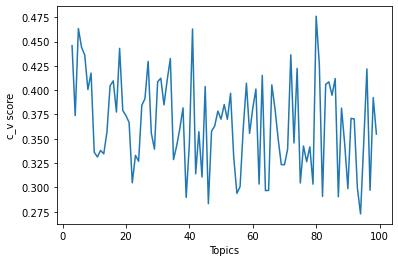

In [20]:
import matplotlib.pyplot as plt
plt.plot([i[0] for i in coherence_sores], [i[1] for i in coherence_sores])
plt.xlabel("Topics")
plt.ylabel("c_v score")
plt.savefig('./plots/final/coherence_scores.png')
plt.show()

In [21]:
max(coherence_sores, key=lambda x : x[1])

[80, 0.47599549242722994]

In [22]:
# number of topics
num_topics = max(coherence_sores, key=lambda x : x[1])[0]
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)
# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())


In [23]:
lda_model.print_topics()[1]

(68,
 '0.016*"love" + 0.014*"know" + 0.010*"ooh" + 0.009*"yeah" + 0.008*"oh" + 0.007*"ayy" + 0.007*"feel" + 0.007*"go" + 0.007*"got" + 0.007*"cause"')

In [35]:
lda_model.get_topic_terms(1)

[(246, 0.073641635),
 (64, 0.023562182),
 (855, 0.018374572),
 (155, 0.014050584),
 (331, 0.010715051),
 (2694, 0.010076253),
 (284, 0.009609017),
 (162, 0.009563466),
 (3, 0.008854919),
 (59, 0.008442483)]

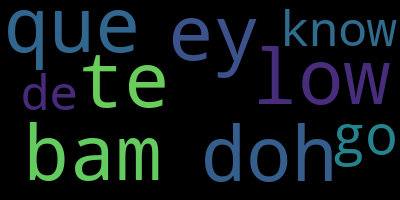

In [40]:
# lda_model.print_topics()
long_string = lda_model.print_topics()[5][1]
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='yellow')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [18]:
# from gensim.models.coherencemodel import CoherenceModel
# # Compute Coherence Score using c_v
# coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.44846006290808926


In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared